# Challenge 1 - Tic Tac Toe

In this lab you will perform deep learning analysis on a dataset of playing [Tic Tac Toe](https://en.wikipedia.org/wiki/Tic-tac-toe).

There are 9 grids in Tic Tac Toe that are coded as the following picture shows:

![Tic Tac Toe Grids](tttboard.jpg)

In the first 9 columns of the dataset you can find which marks (`x` or `o`) exist in the grids. If there is no mark in a certain grid, it is labeled as `b`. The last column is `class` which tells you whether Player X (who always moves first in Tic Tac Toe) wins in this configuration. Note that when `class` has the value `False`, it means either Player O wins the game or it ends up as a draw.

Follow the steps suggested below to conduct a neural network analysis using Tensorflow and Keras. You will build a deep learning model to predict whether Player X wins the game or not.

## Step 1: Data Engineering

This dataset is almost in the ready-to-use state so you do not need to worry about missing values and so on. Still, some simple data engineering is needed.

1. Read `tic-tac-toe.csv` into a dataframe.
1. Inspect the dataset. Determine if the dataset is reliable by eyeballing the data.
1. Convert the categorical values to numeric in all columns.
1. Separate the inputs and output.
1. Normalize the input data.

In [1]:
# your code heree
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

df= pd.read_csv('./tic-tac-toe.csv')

encoder =  LabelEncoder()
df_encoded = df.apply(encoder.fit_transform)



df_input= df_encoded.iloc[:,[x for x in range(0,len(df_encoded.columns)-1)]]
df_output= df_encoded.iloc[:,[len(df_encoded.columns)-1]]

rs = StandardScaler() 
df_input_normalize = pd.DataFrame(rs.fit_transform(df_input), columns= df_input.columns)

display(df_input_normalize)
df_output



,TL,TM,TR,ML,MM,MR,BL,BM,BR
0,1.003223,1.084953,1.003223,1.084953,-0.420077,-0.167318,1.003223,-0.167318,-0.286827
1,1.003223,1.084953,1.003223,1.084953,-0.420077,-0.167318,-0.286827,1.084953,-0.286827
2,1.003223,1.084953,1.003223,1.084953,-0.420077,-0.167318,-0.286827,-0.167318,1.003223
3,1.003223,1.084953,1.003223,1.084953,-0.420077,-0.167318,-0.286827,-1.419590,-1.576877
4,1.003223,1.084953,1.003223,1.084953,-0.420077,-0.167318,-1.576877,-0.167318,-1.576877
...,...,...,...,...,...,...,...,...,...
953,-0.286827,1.084953,1.003223,1.084953,-0.420077,-0.167318,-0.286827,1.084953,1.003223
954,-0.286827,1.084953,-0.286827,1.084953,0.930371,-0.167318,1.003223,-0.167318,1.003223
955,-0.286827,1.084953,-0.286827,1.084953,-0.420077,1.084953,1.003223,-0.167318,1.003223
956,-0.286827,1.084953,-0.286827,-0.167318,0.930371,1.084953,1.003223,-0.167318,1.003223


,class
0,1
1,1
2,1
3,1
4,1
...,...
953,0
954,0
955,0
956,0


## Step 2: Build Neural Network

To build the neural network, you can refer to your own codes you wrote while following the [Deep Learning with Python, TensorFlow, and Keras tutorial](https://www.youtube.com/watch?v=wQ8BIBpya2k) in the lesson. It's pretty similar to what you will be doing in this lab.

1. Split the training and test data.
1. Create a `Sequential` model.
1. Add several layers to your model. Make sure you use ReLU as the activation function for the middle layers. Use Softmax for the output layer because each output has a single lable and all the label probabilities add up to 1.
1. Compile the model using `adam` as the optimizer and `sparse_categorical_crossentropy` as the loss function. For metrics, use `accuracy` for now.
1. Fit the training data.
1. Evaluate your neural network model with the test data.
1. Save your model as `tic-tac-toe.model`.

In [2]:
# your code here
import tensorflow as tf
import matplotlib.pyplot as plt

X_train, X_test, Y_train, Y_test = train_test_split(df_input_normalize, df_output, random_state=42)

# X_train = X_train.reshape(-1, 9, 1)
# Y_train =  Y_train.reshape(-1, 9, 1)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(2,activation='softmax')
])



model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])



(718, 9)
(240, 9)
(718, 1)
(240, 1)


In [3]:
history = model.fit(X_train, 
                    Y_train, 
                    batch_size=64, 
                    epochs=4, 
                    validation_data=(X_test, Y_test))

Epoch 1/4

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

12/12 [==============================] - 0s 28ms/step - loss: 0.6498 - accuracy: 0.6435 - val_loss: 0.6046 - val_accuracy: 0.6875
Epoch 2/4
12/12 [==============================] - 0s 4ms/step - loss: 0.6210 - accuracy: 0.6435 - val_loss: 0.5935 - val_accuracy: 0.6958
Epoch 3/4
12/12 [==============================] - 0s 5ms/step - loss: 0.5994 - accuracy: 0.6838 - val_loss: 0.5894 - val_accuracy: 0.7292
Epoch 4/4
12/12 [==============================] - 0s 5ms/step - loss: 0.5803 - accuracy: 

In [4]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(test_accuracy, test_loss)

8/8 [==============================] - 0s 1ms/step - loss: 0.5753 - accuracy: 0.7375
0.737500011920929 0.5753194689750671


In [5]:
model.save('tic-tac-toe.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: tic-tac-toe.model/assets


## Step 3: Make Predictions

Now load your saved model and use it to make predictions on a few random rows in the test dataset. Check if the predictions are correct.

In [6]:
# your code here
new_model= tf.keras.models.load_model('tic-tac-toe.model')

predictions = new_model.predict(X_test)

In [7]:

results_pred=[np.argmax(predictions[x]) for x in range(X_test.shape[0]) ]

In [8]:
df=Y_test

In [9]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(718, 9)
(240, 9)
(718, 1)
(240, 1)


In [10]:
df['results_pred'] = results_pred

/home/carpiero/miniconda3/envs/ml_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
right=df.loc[df['class']== df['results_pred']].shape[0]/df.shape[0]
wrong=df.loc[df['class']!= df['results_pred']].shape[0]/df.shape[0]

print(f'Correct: {round(right,2)}')
print(f'Incorrect: {round(wrong,2)}')

Correct: 0.74
Incorrect: 0.26


In [12]:
Y_test = Y_test.drop('results_pred',axis=1)


## Step 4: Improve Your Model

Did your model achieve low loss (<0.1) and high accuracy (>0.95)? If not, try to improve your model.

But how? There are so many things you can play with in Tensorflow and in the next challenge you'll learn about these things. But in this challenge, let's just do a few things to see if they will help.

* Add more layers to your model. If the data are complex you need more layers. But don't use more layers than you need. If adding more layers does not improve the model performance you don't need additional layers.
* Adjust the learning rate when you compile the model. This means you will create a custom `tf.keras.optimizers.Adam` instance where you specify the learning rate you want. Then pass the instance to `model.compile` as the optimizer.
    * `tf.keras.optimizers.Adam` [reference](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).
    * Don't worry if you don't understand what the learning rate does. You'll learn about it in the next challenge.
* Adjust the number of epochs when you fit the training data to the model. Your model performance continues to improve as you train more epochs. But eventually it will reach the ceiling and the performance will stay the same.

In [13]:
# your code here

model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(2,activation='softmax')
])

opt = tf.keras.optimizers.Adam(learning_rate=0.01)

model2.compile(optimizer=opt, 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])



In [14]:
history = model2.fit(X_train, 
                    Y_train, 
                    batch_size=80, 
                    epochs=30, 
                    validation_data=(X_test, Y_test))

Epoch 1/30

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

9/9 [==============================] - 0s 20ms/step - loss: 0.6611 - accuracy: 0.6100 - val_loss: 0.5955 - val_accuracy: 0.7083
Epoch 2/30
9/9 [==============================] - 0s 4ms/step - loss: 0.6011 - accuracy: 0.7033 - val_loss: 0.5759 - val_accuracy: 0.7250
Epoch 3/30
9/9 [==============================] - 0s 4ms/step - loss: 0.5579 - accuracy: 0.7479 - val_loss: 0.5379 - val_accuracy: 0.7750
Epoch 4/30
9/9 [==============================] - 0s 4ms/step - loss: 0.5157 - accuracy: 0.80

In [15]:
test_loss, test_accuracy = model2.evaluate(X_test, Y_test)
print(test_accuracy, test_loss)

8/8 [==============================] - 0s 4ms/step - loss: 0.3564 - accuracy: 0.9583
0.9583333134651184 0.3564229905605316


In [16]:
def plot_training(history, metrics: list = ('loss',), figsize: tuple = (12, 5)):
    """
    plots training selected metrics for every batch
    """
    epochs = range(1, len(history.history[metrics[0]]) + 1)

    fig, ax_arr = plt.subplots(1, len(metrics), figsize=figsize)

    if not isinstance(ax_arr, np.ndarray):
        ax_arr = np.array(ax_arr).reshape(1, )

    for i, metric in enumerate(metrics):
        ax_arr[i].plot(epochs, history.history[metric], color='k', linestyle='solid', label=metric, linewidth=2)
        ax_arr[i].plot(epochs, history.history[f"val_{metric}"], color='r', linestyle='dotted',
                       label=f'validation {metric}')
        ax_arr[i].set_ylabel(metric)
        ax_arr[i].set_xlabel('epochs')
        ax_arr[i].grid()
        ax_arr[i].legend()
    plt.show()

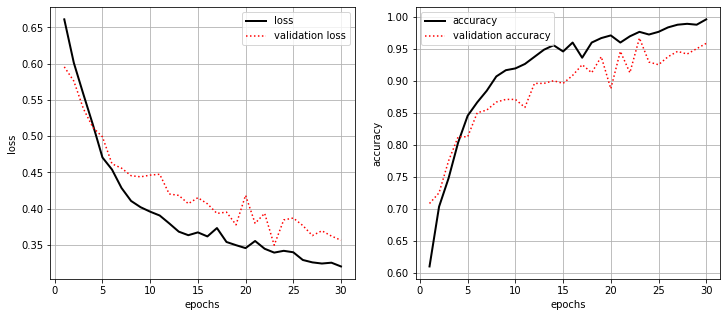

In [17]:
plot_training(history, metrics=['loss', 'accuracy'])

In [18]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 9)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1280      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 258       
Total params: 18,050
Trainable params: 18,050
Non-trainable params: 0
_________________________________________________________________


**Which approach(es) did you find helpful to improve your model performance?**

In [ ]:
# your answer here

# On one side the learning rate improve the results.

# On the other hand the hyperparameters from .fit bach and epocs allowed to improve a lot the model
